In [2]:
from datasets import load_dataset

dataset = load_dataset("ibm/MedMentions-ZS")

/Users/shashankjatav/.virtualenvs/bioner/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/shashankjatav/.virtualenvs/bioner/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 26770
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1289
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1048
    })
})

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 26770
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1289
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1048
    })
})

In [5]:
df_train = dataset["test"].to_pandas()
df_train

,tokens,ner_tags
0,"[DCTN4, as, a, modifier, of, chronic, Pseudomo...","[B-T103, O, O, O, O, B-T038, I-T038, I-T038, I..."
1,"[Pseudomonas, aeruginosa, (, Pa, ), infection,...","[B-T038, I-T038, I-T038, I-T038, I-T038, I-T03..."
2,"[By, using, exome, sequencing, and, extreme, p...","[O, O, B-T062, I-T062, O, O, O, O, O, O, O, O,..."
3,"[The, purpose, of, this, study, was, to, inves...","[O, O, O, O, B-T062, O, O, O, O, O, O, B-T103,..."
4,"[Polymerase, chain, reaction, and, direct, seq...","[B-T062, I-T062, I-T062, O, B-T062, I-T062, O,..."
...,...,...
26765,"[Radiographic, underestimation, of, the, true,...","[B-T058, B-T033, O, O, O, O, O, O, O, O, O, O,..."
26766,"[Variation, between, clinicians, was, huge, (,...","[O, O, O, O, B-T033, O, O, B-T058, I-T058, O, ..."
26767,"[All, evaluation, methods, significantly, unde...","[O, B-T062, I-T062, O, O, O, O, O, O, O]"
26768,"[Bone, sounding, was, most, accurate, ,, where...","[B-T058, I-T058, O, O, O, O, O, B-T058, I-T058..."


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("Number of samples:", len(df_train))
print("Columns:", df_train.columns)
print("Example sample:")
print(df_train.head())

Number of samples: 26770
Columns: Index(['tokens', 'ner_tags'], dtype='object')
Example sample:
                                              tokens  \
0  [DCTN4, as, a, modifier, of, chronic, Pseudomo...   
1  [Pseudomonas, aeruginosa, (, Pa, ), infection,...   
2  [By, using, exome, sequencing, and, extreme, p...   
3  [The, purpose, of, this, study, was, to, inves...   
4  [Polymerase, chain, reaction, and, direct, seq...   

                                            ner_tags  
0  [B-T103, O, O, O, O, B-T038, I-T038, I-T038, I...  
1  [B-T038, I-T038, I-T038, I-T038, I-T038, I-T03...  
2  [O, O, B-T062, I-T062, O, O, O, O, O, O, O, O,...  
3  [O, O, O, O, B-T062, O, O, O, O, O, O, B-T103,...  
4  [B-T062, I-T062, I-T062, O, B-T062, I-T062, O,...  


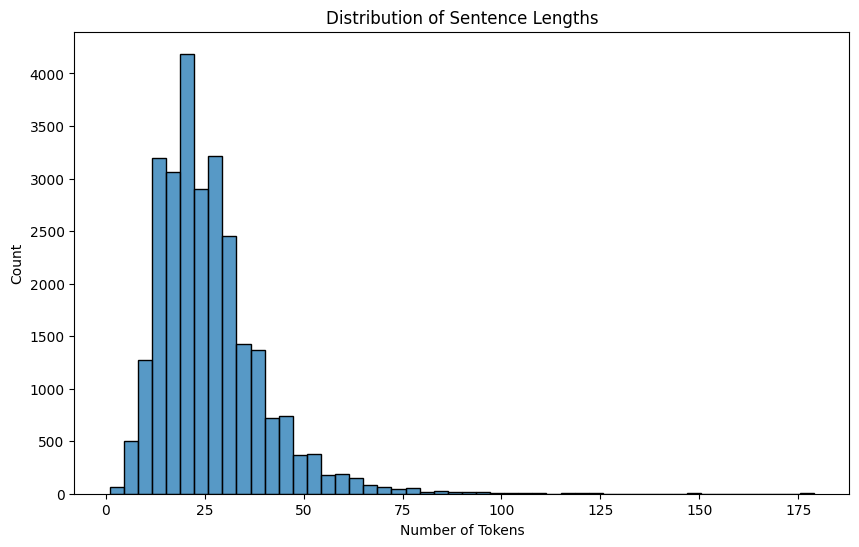

In [10]:
df_train['num_tokens'] = df_train['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='num_tokens', bins=50)
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Count")
plt.show()

In [12]:
from collections import Counter
all_ner_tags_train = [tag for sublist in dataset['test']['ner_tags'] for tag in sublist]

ner_tag_counts_train = Counter(all_ner_tags_train)

# Print the counts
print("NER Tag Counts:")
for tag, count in ner_tag_counts_train.items():
    print(f"{tag}: {count}")

NER Tag Counts:
B-T103: 22360
O: 515420
B-T038: 25007
I-T038: 15708
B-T033: 9824
I-T033: 6432
B-T062: 5445
I-T062: 4392
I-T103: 14011
B-T098: 3574
B-T017: 12575
I-T017: 7474
B-T074: 1165
I-T074: 1030
B-T082: 7511
I-T082: 2998
B-T058: 14779
I-T058: 12088
B-T170: 5996
I-T098: 881
I-T170: 5118
B-T204: 4922
I-T204: 2360


In [13]:
all_ner_tags_test = [tag for sublist in dataset['test']['ner_tags'] for tag in sublist]

ner_tag_counts_test = Counter(all_ner_tags_test)

# Print the counts
print("NER Tag Counts:")
for tag, count in ner_tag_counts_test.items():
    print(f"{tag}: {count}")

NER Tag Counts:
O: 27433
B-T031: 212
B-T097: 360
I-T097: 136
B-T007: 448
I-T007: 555
B-T168: 321
I-T168: 115
I-T031: 69
B-T022: 89
I-T022: 45


In [14]:
all_ner_tags_val = [tag for sublist in dataset['validation']['ner_tags'] for tag in sublist]

ner_tag_counts_val = Counter(all_ner_tags_val)

# Print the counts
print("NER Tag Counts:")
for tag, count in ner_tag_counts_val.items():
    print(f"{tag}: {count}")

NER Tag Counts:
O: 34400
B-T201: 404
I-T201: 236
B-T091: 196
B-T037: 434
B-T005: 224
B-T092: 452
I-T091: 124
I-T092: 478
I-T037: 225
I-T005: 124


## No overlap between train test and validation

### Another version of medmention

In [3]:
dataset_new = load_dataset("bigbio/medmentions")

/Users/shashankjatav/.virtualenvs/bioner/lib/python3.9/site-packages/datasets/load.py:1429: FutureWarning: The repository for bigbio/medmentions contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bigbio/medmentions
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Generating train split: 2635 examples [00:01, 2080.39 examples/s]
Generating test split: 879 examples [00:00, 1697.26 examples/s]
Generating validation split: 878 examples [00:00, 1853.33 examples/s]


In [4]:
dataset_new

DatasetDict({
    train: Dataset({
        features: ['pmid', 'passages', 'entities'],
        num_rows: 2635
    })
    test: Dataset({
        features: ['pmid', 'passages', 'entities'],
        num_rows: 879
    })
    validation: Dataset({
        features: ['pmid', 'passages', 'entities'],
        num_rows: 878
    })
})

In [11]:
dataset_new["train"][0].get('entities')

[{'text': ['DCTN4'],
  'offsets': [[0, 5]],
  'concept_id': 'C4308010',
  'semantic_type_id': ['T116', 'T123']},
 {'text': ['chronic Pseudomonas aeruginosa infection'],
  'offsets': [[23, 63]],
  'concept_id': 'C0854135',
  'semantic_type_id': ['T047']},
 {'text': ['cystic fibrosis'],
  'offsets': [[67, 82]],
  'concept_id': 'C0010674',
  'semantic_type_id': ['T047']},
 {'text': ['Pseudomonas aeruginosa (Pa) infection'],
  'offsets': [[83, 120]],
  'concept_id': 'C0854135',
  'semantic_type_id': ['T047']},
 {'text': ['cystic fibrosis'],
  'offsets': [[124, 139]],
  'concept_id': 'C0010674',
  'semantic_type_id': ['T047']},
 {'text': ['CF'],
  'offsets': [[141, 143]],
  'concept_id': 'C0010674',
  'semantic_type_id': ['T047']},
 {'text': ['patients'],
  'offsets': [[145, 153]],
  'concept_id': 'C0030705',
  'semantic_type_id': ['T101']},
 {'text': ['long-term'],
  'offsets': [[179, 188]],
  'concept_id': 'C0443252',
  'semantic_type_id': ['T079']},
 {'text': ['pulmonary disease'],
  'of

In [9]:
dataset['train'][0]

{'tokens': ['DCTN4',
  'as',
  'a',
  'modifier',
  'of',
  'chronic',
  'Pseudomonas',
  'aeruginosa',
  'infection',
  'in',
  'cystic',
  'fibrosis'],
 'ner_tags': ['B-T103',
  'O',
  'O',
  'O',
  'O',
  'B-T038',
  'I-T038',
  'I-T038',
  'I-T038',
  'O',
  'B-T038',
  'I-T038']}

### Earlier dataset was wrong

Convert this dataset to proper format for training

In [12]:
dataset_new["train"][0]

{'pmid': '25763772',
 'passages': [{'type': 'title',
   'text': ['DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis'],
   'offsets': [[0, 82]]},
  {'type': 'abstract',
   'text': ['Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA s

In [36]:
import re
[(m.start(0), m.end(0)) for m in re.finditer('Pseudomonas', 'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis')]

[(31, 42)]

In [35]:
'Pseudomonas' in 'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis'

True

In [26]:
def get_token_role_in_span(token_start: int, token_end: int, span_start: int, span_end: int):
    """
    Check if the token is inside a span.
    Args:
      - token_start, token_end: Start and end offset of the token
      - span_start, span_end: Start and end of the span
    Returns:
      - "B" if beginning
      - "I" if inner
      - "O" if outer
      - "N" if not valid token (like <SEP>, <CLS>, <UNK>)
    """
    if token_end <= token_start:
        return "N"
    if token_start < span_start or token_end > span_end:
        return "O"
    if token_start > span_start:
        return "I"
    else:
        return "B"

In [52]:
def get_semantic_type(searchstr: str, entities: list, token_start: int, token_end: int) -> str:
    for i in entities:
        span_start = i.get('offsets')[0][0]
        span_end = i.get('offsets')[0][1]
        if token_start>=span_start and token_end<=span_end:
            if searchstr in i.get('text')[0]:
                return get_token_role_in_span(token_start, token_end, span_start, span_end)+'-' + i.get('semantic_type_id')[0]
    return "O"


In [53]:
get_semantic_type("Pseudomonas",  dataset_new["train"][0].get('entities'), 31, 42)

31 42 23 63
['chronic Pseudomonas aeruginosa infection']


'I-T047'